<a href="https://colab.research.google.com/github/LEChaney/ML-RayCast-Experiments/blob/master/Image_GeneratorV7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!git clone https://github.com/LEChaney/ML-RayCast-Experiments
%cd ML-RayCast-Experiments
%pwd

Cloning into 'ML-RayCast-Experiments'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 279 (delta 29), reused 2 (delta 0), pack-reused 206
Receiving objects: 100% (279/279), 44.85 MiB | 13.22 MiB/s, done.
Resolving deltas: 100% (137/137), done.
/content/ML-RayCast-Experiments


'/content/ML-RayCast-Experiments'

In [0]:
from PIL import Image
def rotate(image_path):
    """
    Rotate the given photo the amount of given degreesk, show it and save it
    @param image_path: The path to the image to edit
    @param degrees_to_rotate: The number of degrees to rotate the image
    @param saved_location: Path to save the cropped image
    """
    degrees_to_rotate = 180
    image_obj = Image.open(image_path)
    rotated_image = image_obj.rotate(degrees_to_rotate)
    rotated_image.save("000.png")
    im = cv2.imread("000.png")
    #plt.imshow(im)
    #plt.show()
    return im
    


In [0]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
file_directory = os.getcwd()
os.chdir("/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master")
print(os.getcwd())

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master'

In [0]:
import sys
#sys.path.pop(1)
sys.path.insert(1,"/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master/game")
print(sys.path)

['C:\\Users\\Lance Chaney\\Desktop\\ml-experiments', '/content/ML-RayCast-Experiments/Keras-FlappyBird-master/Keras-FlappyBird-master/game', 'Keras-FlappyBird-master/Keras-FlappyBird-master/game', './game', './game', 'C:\\Anaconda3\\envs\\tensorflow113\\python37.zip', 'C:\\Anaconda3\\envs\\tensorflow113\\DLLs', 'C:\\Anaconda3\\envs\\tensorflow113\\lib', 'C:\\Anaconda3\\envs\\tensorflow113', '', 'C:\\Anaconda3\\envs\\tensorflow113\\lib\\site-packages', 'C:\\Anaconda3\\envs\\tensorflow113\\lib\\site-packages\\mask_rcnn-2.1-py3.7.egg', 'C:\\Anaconda3\\envs\\tensorflow113\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Lance Chaney\\.ipython']


In [0]:
%pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [0]:
import wrapped_flappy_bird as game
import numpy as np
import flappy_bird_utils
import cv2
import sys
import random
import pygame
import pygame.surfarray as surfarray
from pygame.locals import *
from itertools import cycle
import matplotlib.pyplot as plt
import PIL.Image
#from cStringIO import StringIO
import IPython.display


In [0]:
GAME = 'bird' # the name of the game being played for log files
CONFIG = 'nothreshold'
ACTIONS = 2 # number of valid actions
GAMMA = 0.99 # decay rate of past observations
OBSERVATION = 3200. # timesteps to observe before training
EXPLORE = 3000000. # frames over which to anneal epsilon
FINAL_EPSILON = 0.0001 # final value of epsilon
INITIAL_EPSILON = 0.1 # starting value of epsilon
REPLAY_MEMORY = 50000 # number of previous transitions to remember
BATCH = 32 # size of minibatch
FRAME_PER_ACTION = 1
LEARNING_RATE = 1e-4

FPS = 30
SCREENWIDTH  = 288
SCREENHEIGHT = 512

pygame.init()
pygame.display.init()
pygame.display.set_mode((1, 1))
FPSCLOCK = pygame.time.Clock()
SCREEN = pygame.Surface((SCREENWIDTH, SCREENHEIGHT)).convert_alpha()
pygame.display.set_caption('Flappy Bird')

IMAGES, SOUNDS, HITMASKS = flappy_bird_utils.load()
PIPEGAPSIZE = 100 # gap between upper and lower part of pipe
BASEY = SCREENHEIGHT * 0.79

PLAYER_WIDTH = IMAGES['player'][0].get_width()
PLAYER_HEIGHT = IMAGES['player'][0].get_height()
PIPE_WIDTH = IMAGES['pipe'][0].get_width()
PIPE_HEIGHT = IMAGES['pipe'][0].get_height()
BACKGROUND_WIDTH = IMAGES['background'].get_width()

PLAYER_INDEX_GEN = cycle([0, 1, 2, 1])

img_rows , img_cols = 80, 80
#Convert image into Black and white
img_channels = 4 #We stack 4 frames

game_state = game.GameState()
do_nothing = np.zeros(ACTIONS)
do_nothing[0] = 1
game_state.frame_step(do_nothing)

(array([[[0, 0, 0]]], dtype=uint8), 0.1, False)

In [0]:

'''import numpy as np
import sys
import random
import pygame
import flappy_bird_utils
import pygame.surfarray as surfarray
from pygame.locals import *
from itertools import cycle'''

def Image_Generator(filepath):

    file = open(filepath,"r")
    running = True
    count = 100
    while running:
        current = file.readline()
        count -= 1
        if current == "":
            break;
        if current[0] == "-":
            continue
        if count > 1:
            continue
        if count == 0:
            break;
        data_list = current.split(" ")
        data_list.pop()
        
        ''' if (len(data_list) < 16):
            loop_times = 16 - len(data_list)
            counter = 0
            while counter < loop_times:
                data_list.append(None)
                counter += 1'''
        #print(data_list)
        #data_list = list(map(int, data_list))

        CaseNo = int(float(data_list[0]))
        game_state.playerx = int(float(data_list[1]))# + SCREENWIDTH /2)
        game_state.playery = int(float(data_list[2]))# + SCREENWIDTH /2)
        game_state.playerIndex = int(data_list[3])        
        
        game_state.upperPipes = []
        game_state.lowerPipes = []
        
        for i in range(4,len(data_list),4):
          
            newPipe = game.getRandomPipe()
            game_state.upperPipes.append(newPipe[0])
            game_state.upperPipes[int((i-4)/4)]['x'] = int(float(data_list[i]))# + SCREENWIDTH /2)
            game_state.upperPipes[int((i-4)/4)]['y'] = int(float(data_list[i+1]))# + SCREENWIDTH /2)

            game_state.lowerPipes.append(newPipe[1])
            game_state.lowerPipes[int((i-4)/4)]['x'] = int(float(data_list[i+2]))# + SCREENWIDTH /2)
            game_state.lowerPipes[int((i-4)/4)]['y'] = int(float(data_list[i+3]))# + SCREENWIDTH /2)
        
        # draw sprites
        SCREEN.blit(IMAGES['background'], (0,0))

        for uPipe, lPipe in zip(game_state.upperPipes, game_state.lowerPipes):
            SCREEN.blit(IMAGES['pipe'][0], (uPipe['x'], uPipe['y']))
            SCREEN.blit(IMAGES['pipe'][1], (lPipe['x'], lPipe['y']))

        SCREEN.blit(IMAGES['base'], (game_state.basex, BASEY))
        # print score so player overlaps the score
        # showScore(self.score)
        SCREEN.blit(IMAGES['player'][game_state.playerIndex],
                    (game_state.playerx, game_state.playery))

        image_data = pygame.surfarray.array3d(SCREEN)
        #IPython.display.display(PIL.Image.fromarray(image_data))
        
        #running = False
    #print(type(image_data))
    print("image_data" ,image_data)
    print("image_data.shape: ", image_data.shape)
    IPython.display.display(PIL.Image.fromarray(image_data))
    #plt.show()      
                       
    #print("bird_down: ", bird_down)      
    file.close()

image_data [[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [222 216 149]
  [222 216 149]
  [222 216 149]]]
image_data.shape:  (288, 512, 3)


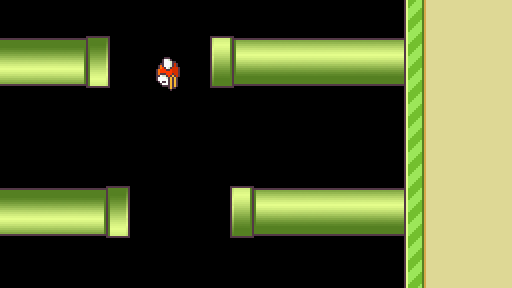

In [0]:
file= "data.txt" #file path or a file in the current folder
Image_Generator(file)